# Analysing Airline Service Excellence through AI-Powered Natural Language Processing of Customer Feedback: A Case Study of British Airways

MSc Artificial Intelligence, University of Plymouth, September, 2024

# Aim

This study aims to utilize AI-powered NLP techniques to analyse customer feedback for British Airways, deriving sentiments and preferences to guide service improvement strategies and enhance overall customer satisfaction. This can help airlines identify areas for improvement and understand the factors that most significantly influence passenger satisfaction.

# Dataset
The dataset consists of customer reviews from various popular airlines, collected between 2011 and 2023. It includes reviews from 3,700 customers and features 19 columns of information. These columns encompass various aspects of the customer experience, providing a comprehensive view of their satisfaction and preferences. This data is instrumental in analyzing and improving airline services based on customer feedback and sentiment analysis.

# Pediction target
The dependent or response variable will be **Overall Rating** or **Customer Recommendation**.

# Stages

The stages to be implemented in this research will include the following steps:

1. Reading and exploring of data
2. Data Preprocessing
- Non-Text (Structured data) Pre-processing
- Text Pre-processing
- Feature extraction: Sentiment analysis using  VADER, TextBLOB.
- Feature Engineering:
3. Exploratory Data Analysis / visualization
4. Feature Selection: using correlation analysis or variance inflation
5. Vectorization of text column using TF-IDF
6. Model Development
- Classification models: with cross validation and feature importance
- Deep learning with LSTM, RNN
7. Model Evaluation
8. Hyperparameter Tuning
9. Model Interpretation and Testing

# Importing our packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Airline dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BA_AirlineReviews.csv')

In [ ]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
# drop the unnamed column
df = df.drop(df.columns[0], axis=1)
df.head(2)

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0


In [ ]:
# check the dimension of the airline dataset

df.shape

(3701, 19)

- there are 3701 rows and 19 comuns in the dataset

In [ ]:
# check the columns/ variables present
df.columns

Index(['OverallRating', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview',
       'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity'],
      dtype='object')

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          3696 non-null   float64
 1   ReviewHeader           3701 non-null   object 
 2   Name                   3701 non-null   object 
 3   Datetime               3701 non-null   object 
 4   VerifiedReview         3701 non-null   bool   
 5   ReviewBody             3701 non-null   object 
 6   TypeOfTraveller        2930 non-null   object 
 7   SeatType               3699 non-null   object 
 8   Route                  2926 non-null   object 
 9   DateFlown              2923 non-null   object 
 10  SeatComfort            3585 non-null   float64
 11  CabinStaffService      3574 non-null   float64
 12  GroundService          2855 non-null   float64
 13  ValueForMoney          3700 non-null   float64
 14  Recommended            3701 non-null   object 
 15  Airc

In [ ]:
# checking for missing values
df.isnull().sum()

OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

- there is a vast number of missing values in crucial features such as 'Aircraft' type, 'Wifi&Connectivity'  and 'InFlightEntertainment'. Dropping this missing rows would lead to a significant loss of information. This can be addressed by using median or mode imputation for categorical variables and mean or median for numerical variable; however, this approach may also introduce bias.

In [ ]:
# checking for duplicates

df.duplicated().sum()

7

- there are 7 duplicated rows in the data; these will be removed during the pre-processing stage

# Data pre-processing / Manipulations

The structured data inclding the categorical variables will be pre-processed separately from the text/ unstructed variables because they have different formats and require distinct processing techniques. Text data involves natural language processing tasks like tokenization and vectorization using packages like NLTK, while structured data involves numerical and categorical transformations, feature engineering, and label encoding.

## Structured data Pre-processing
- removal of duplicates
- treatment of missing values
- Label Encoding
- Feature Engineering

In [ ]:
# removal of duplicates
df = df.drop_duplicates()
df.shape

(3694, 19)

In [ ]:
# treatment of missing values

# exploring the categorical variables
categorical_var  = df.select_dtypes(exclude = "number")
#categorical_var.head()

for values in categorical_var:
    print(df[values].value_counts())
    print("-" * 50) # Separation line

ReviewHeader
British Airways customer review      949
"never fly British Airways again"      6
"Overall a good flight"                5
"I was pleasantly surprised"           3
"BA has gone downhill"                 3
                                    ... 
"personal space is so tight"           1
"arrived reasonably promptly"          1
"very professional and pleasant"       1
"a fantastic flight"                   1
"cannot fault the service"             1
Name: count, Length: 2684, dtype: int64
--------------------------------------------------
Name
David Ellis       42
Clive Drake       32
E Smyth           30
R Vines           14
Richard Hodges    13
                  ..
A Thadaram         1
C Norton           1
A George           1
B Palmer           1
C Volz             1
Name: count, Length: 2906, dtype: int64
--------------------------------------------------
Datetime
19th January 2015     26
20th November 2014    18
28th October 2014     14
12th October 2014     12
6th Septe

In [ ]:
df.isnull().sum()

OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           764
SeatType                    2
Route                     768
DateFlown                 771
SeatComfort               116
CabinStaffService         127
GroundService             839
ValueForMoney               1
Recommended                 0
Aircraft                 1772
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3085
dtype: int64

In [ ]:
# treating OverallRating
df["OverallRating"].value_counts()

OverallRating
1.0     864
2.0     424
3.0     406
8.0     370
10.0    327
7.0     312
9.0     309
4.0     253
5.0     234
6.0     190
Name: count, dtype: int64

While the OverallRating variable looks numeric in nature, it takes on discrete values (1.0, 2.0, 3.0, ..., 10.0) which represent specific categories of satisfaction or ratings. Hence, it is considered a categorical variable with ordinal characteristics. The missing values in this column will therefore be replaced with the mode. However since the column is the potential target for this research, the 5 missing values will be dropped to prevent bias. This ensures that the model is trained on complete data, which helps maintain the integrity and quality


In [ ]:
# dropping the 5 missing values in the target variable
df = df.dropna(subset=['OverallRating'])


In [ ]:
# treating TypeOfTraveller
df["TypeOfTraveller"].value_counts()#

TypeOfTraveller
Couple Leisure    1000
Solo Leisure       891
Business           641
Family Leisure     398
Name: count, dtype: int64

In [ ]:
# filling the missing rows with mode since the column is categorical
mode_value = df['TypeOfTraveller'].mode()[0]
df['TypeOfTraveller'].fillna(mode_value, inplace=True)


In [ ]:
# treating SeatType
df["SeatType"].value_counts()

SeatType
Economy Class      1922
Business Class     1193
Premium Economy     360
First Class         212
Name: count, dtype: int64

In [ ]:
# filling the missing rows with mode since the column is categorical
mode_value = df['SeatType'].mode()[0]
df['SeatType'].fillna(mode_value, inplace=True)


In [ ]:
# treating route
df["Route"].value_counts()

Route
London to Johannesburg                       17
London to Cape Town                          15
Johannesburg to London                       13
London to Hong Kong                          13
Cape Town to London                          13
                                             ..
Brindisi to London                            1
Los Angeles to Leeds via London Heathrow      1
Kuala Lumpur to London Heathrow               1
Prague to Heathrow                            1
BOM-LHR                                       1
Name: count, Length: 1590, dtype: int64

In [ ]:
df["Route"].nunique()

1590

Given the high number of missing values in the Route column is 768 and the large number of unique routes is 1590, imputing these missing values can be challenging. To address, rather than treating the missing values, we will implement feature engineering approach by creating an indicator variable that will flag rows where the Route was missing. This approach avoids introducing bias while retaining the information about which rows had missing values.

In addition, the large number of unique values in the Route column will be addressed by splitting the routes into departure and arrival cities. This can reduce the number of unique values and still capture the essential information. The route will also be replaced its frequency count in the dataset. This is crucial to reduce the dimensionality of the dataset, improve model performance, and prevent overfitting.  

In [ ]:
# Handle missing values before splitting
df['Route'].fillna('Unknown_Route', inplace=True)

# Create binary indicator for missing values
df['Route_missing'] = df['Route'].apply(lambda x: 1 if x == 'Unknown_Route' else 0)

# Split 'Route' into 'DepartureCity' and 'ArrivalCity'
route_split = df['Route'].str.split(' to ', n=1, expand=True)
df[['DepartureCity', 'ArrivalCity']] = route_split

# Fill any missing values in the split columns
df['DepartureCity'].fillna('Unknown_City', inplace=True)
df['ArrivalCity'].fillna('Unknown_City', inplace=True)

# Create frequency of each route
route_counts = df['Route'].value_counts()
df['RouteFrequency'] = df['Route'].map(route_counts)

# Drop the original 'Route' column
df.drop(columns=['Route'], inplace=True)

# Display the DataFrame after imputation
df.head(1)


,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,DateFlown,SeatComfort,...,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,Route_missing,DepartureCity,ArrivalCity,RouteFrequency
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,November 2023,1.0,...,1.0,no,NaN,NaN,NaN,NaN,0,London,Stuttgart,1


In [ ]:
# treating VerifiedReview
df["VerifiedReview"].value_counts()

VerifiedReview
False    2536
True     1153
Name: count, dtype: int64

- the VerifiedReview column is clean

In [ ]:
# treating DateFlown  and DateTime
df["DateFlown"].value_counts()

DateFlown
August 2015       83
September 2015    78
November 2015     66
April 2017        65
October 2015      64
                  ..
November 2014      2
October 2014       1
June 2020          1
August 2014        1
July 2014          1
Name: count, Length: 112, dtype: int64

- the DateFlown column has 112 unique entries with 778 missing values

In [ ]:
df["Datetime"].value_counts()

Datetime
19th January 2015     26
20th November 2014    18
28th October 2014     14
12th October 2014     12
31st May 2015         12
                      ..
23rd January 2019      1
24th January 2019      1
25th January 2019      1
2nd February 2019      1
9th October 2011       1
Name: count, Length: 1820, dtype: int64

- the DateTime column has 1820 unique entries with 0 missing value

- The DateFlown and Datetime columns tend to provide similar information with the DateFlown more promising since it reflects the actual flight time when the flight took place. This column would provide insights into the true performance and service quality, which is essential for accurate reporting and analysis. However, since Datetime has no missing values, the corresponding values in it will be replaced with the missing values in 'DateFlown'

These columns are not totally useful on their own; to generate enough insights from them, some structured features can be engineered. for example

1. 'Year': this helps to analyze trends over time
2. 'Month' to capture seasonal effects.
3. 'MonthsSinceReference' to quantify how recent the flight was, revealing trends over time.
4. 'Quarters' to analyze seasonal trends.

In [ ]:
# Impute missing values in 'DateFlown' from 'Datetime' where applicable
df['DateFlown'].fillna(df['Datetime'], inplace=True)

# Drop the 'Datetime' column as 'DateFlown' now contains the necessary information
df.drop(columns=['Datetime'], inplace=True)

# check for missing values
df['DateFlown'].isnull().sum()

0

In [ ]:
# convert 'DateFlown' to datetime format to aid feature engineering
df['DateFlown'] = pd.to_datetime(df['DateFlown'])

print(df['DateFlown'])


0      2023-11-01
1      2023-11-01
2      2023-11-01
3      2022-12-01
4      2023-11-01
          ...    
3696   2012-08-29
3697   2012-08-28
3698   2011-10-12
3699   2011-10-11
3700   2011-10-09
Name: DateFlown, Length: 3689, dtype: datetime64[ns]


<ipython-input-26-8402b2905ce7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateFlown'] = pd.to_datetime(df['DateFlown'])


In [ ]:
# Extract Year and Month
df['Year'] = df['DateFlown'].dt.year
df['Month'] = df['DateFlown'].dt.month

# Define a reference date ; using the earliest date
reference_date = df['DateFlown'].min()

# Calculate the number of months since the reference date
df['MonthsSinceReference'] = ((df['DateFlown'].dt.year - reference_date.year) * 12 +
                                 df['DateFlown'].dt.month - reference_date.month)

#Extracting Financial Quarter:
df['Quarter'] = df['DateFlown'].dt.to_period('Q').astype(str)


# Drop the original 'DateFlown' column
df.drop(columns=['DateFlown'], inplace=True)
df.head(1)


,OverallRating,ReviewHeader,Name,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,...,InflightEntertainment,Wifi&Connectivity,Route_missing,DepartureCity,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter
0,1.0,"""Service level far worse then Ryanair""",L Keele,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,1.0,1.0,1.0,...,NaN,NaN,0,London,Stuttgart,1,2023,11,145,2023Q4


In [ ]:
# treating SeatComfort
df["SeatComfort"].value_counts()

SeatComfort
3.0    849
1.0    825
4.0    814
2.0    593
5.0    492
Name: count, dtype: int64

The SeatComfort column appears to represent a rating of the seat comfort on a scale from 1 to 5, with higher values indicating better comfort. Given that the missing values are relatively small in proportion and the column is discrete/ categorical, the best approach is to use mode imputation in treating the missing values.

In [ ]:
mode_value = df['SeatComfort'].mode()[0]
df['SeatComfort'].fillna(mode_value, inplace=True)

In [ ]:
# treating CabinStaffService
df["CabinStaffService"].value_counts()

CabinStaffService
5.0    1035
4.0     712
1.0     695
3.0     623
2.0     497
Name: count, dtype: int64

this column is also categorical with a relatively small number of missing values. Hence mode imputation will be adopted

In [ ]:
mode_value = df['CabinStaffService'].mode()[0]
df['CabinStaffService'].fillna(mode_value, inplace=True)

In [ ]:
# treating GroundService
df["GroundService"].value_counts()

GroundService
1.0    872
4.0    632
3.0    563
5.0    428
2.0    360
Name: count, dtype: int64

The GroundService column appears to rate ground service quality on a scale from 1 to 5. A similar approach to the one used for SeatComfort is appropriate for treating the missin values

In [ ]:
mode_value = df['GroundService'].mode()[0]
df['GroundService'].fillna(mode_value, inplace=True)

In [ ]:
# treating ValueForMoney
df["ValueForMoney"].value_counts()

ValueForMoney
1.0    1199
4.0     673
3.0     665
2.0     576
5.0     575
Name: count, dtype: int64

In [ ]:
mode_value = df['ValueForMoney'].mode()[0]
df['ValueForMoney'].fillna(mode_value, inplace=True)

In [ ]:
# treating Aircraft
df["Aircraft"].value_counts()

Aircraft
A320                     366
Boeing 777               272
Boeing 747-400           182
A380                     166
Boeing 777-200           125
                        ... 
A319 / Boeing 787-9        1
Boeing 747-400 / A319      1
A320 / Boeing 747-400      1
Boeing 777 / A380          1
Airbus 319                 1
Name: count, Length: 202, dtype: int64

- there are multiple unique values in the Aircraft column which is a key component of the research. Grouping the values will simplify analysis by reducing noise from overly specific or inconsistent entries. It consolidates similar aircraft into broader categories, enhancing data quality, improving model performance, and making insights more interpretable and actionable.

- to achieve this, we need to identify the exact values in the column and this can be achieved by iterating through the unique values to understand their diversity and then group them accordingly.

In [ ]:
# Get unique values in the 'Aircraft' column
unique_aircraft = df['Aircraft'].unique()

# iterate through the unique aircraft values
for aircraft in unique_aircraft:
    print(aircraft)

nan
A320
Boeing 777-300
Boeing 777
A321 neo
A380-800
A320-232
A321
Boeing 787
BA366
A380
777-300 and A320
A350
Boeing 777-200
A320neo
Embraer-190
A380 / A320
Embraer
Boeing 787-8
E190
A320 A350
A320Neo
A321neo
Boeing 777 -200
A321Neo
Embraer 190
Boeing 737
A320 Finnair
A319
Boeing 787-9
Dreamliner
Boeing 787 / A320
Boeing 777 / A320
Boeing 777-300ER
A320, A380
A350-1000
Boeing 787-10
A320-200
A320, Boeing 787
A321 Neo
Boeing 737 800
A320 / Boeing 777
Boeing 777-200ER
Boeing 787-900
A321-neo
A322
Boeing 737-800
A320 Neo
A320NEO
A330
A230
A321NEO
Boeing 747
Embraer 195
Boeing 747-400
Boeing 777-200 / 747-400
Boeing 777 - 200
Boeing 787-9, A320-200
EMB190
A319 / Boeing777
A340-300, A320
A321-200
B777-200
A320 neo
A319 / Boeing 789
Boeing 777-200 and A319
A321 / Boeing 787-9
Boeing 777 / 747
A319 / Boeing 777
B747-400 in retro
A319/A320
B737-400 / A380 / A319
Boeing 744
A380 / Boeing 777
Boeing 747 400
Boeing 777-200/300
777
A320/B788
Boeing 787-9 / A319
B777
B747-400
A380 / A319
Boeing 78

In [ ]:
df['Aircraft'].fillna('Unknown', inplace=True) # imputing with a placeholder value rather than mode imputation to prevent unnecassary bias

# Define grouping function
def group_aircraft(aircraft):
    aircraft = aircraft.lower() # Convert to lowercase for case-insensitive matching
    # Manufacturer-based grouping
    if 'airbus' in aircraft or 'a3' in aircraft:
        if 'a320' in aircraft:
            return 'Airbus A320 Family'
        elif 'a350' in aircraft:
            return 'Airbus A350 Family'
        elif 'a380' in aircraft:
            return 'Airbus A380 Family'
        elif 'a330' in aircraft:
            return 'Airbus A330 Family'
        elif 'a318' in aircraft:
            return 'Airbus A318'
        elif 'a321' in aircraft:
            return 'Airbus A321 Family'
        elif 'a322' in aircraft:
            return 'Airbus A322'
        else:
            return 'Airbus Other'

    elif 'boeing' in aircraft:
        if '737' in aircraft:
            return 'Boeing 737 Family'
        elif '747' in aircraft:
            return 'Boeing 747 Family'
        elif '757' in aircraft:
            return 'Boeing 757'
        elif '767' in aircraft:
            return 'Boeing 767 Family'
        elif '777' in aircraft:
            return 'Boeing 777 Family'
        elif '787' in aircraft:
            return 'Boeing 787 Family'
        elif '787' in aircraft:
            return 'Boeing 787 Family'
        else:
            return 'Boeing Other'

    elif 'embraer' in aircraft:
        if '190' in aircraft:
            return 'Embraer E190 Family'
        elif '170' in aircraft:
            return 'Embraer E170 Family'
        else:
            return 'Embraer Other'

    elif 'saab' in aircraft:
        return 'Saab 2000'

    elif 'dreamliner' in aircraft:
        return 'Boeing 787 Dreamliner'

    elif 'various' in aircraft:
        return 'Various'

    else:
        return 'Others'

# Apply the grouping function
df['Aircraft_Company'] = df['Aircraft'].apply(group_aircraft)

# Display the grouped DataFrame
df.head(1)

,OverallRating,ReviewHeader,Name,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,...,Wifi&Connectivity,Route_missing,DepartureCity,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter,Aircraft_Company
0,1.0,"""Service level far worse then Ryanair""",L Keele,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,1.0,1.0,1.0,...,NaN,0,London,Stuttgart,1,2023,11,145,2023Q4,Others


In [ ]:
# drop the original 'Aircraft' column
df.drop(columns=['Aircraft'], inplace=True)


In [ ]:
df['Aircraft_Company'].value_counts()

Aircraft_Company
Others                   1795
Boeing 777 Family         472
Airbus A320 Family        451
Boeing 747 Family         287
Airbus A380 Family        203
Airbus Other              134
Boeing 787 Family         130
Airbus A321 Family        115
Boeing 767 Family          45
Airbus A350 Family         18
Boeing 737 Family          12
Embraer Other               6
Embraer E190 Family         5
Airbus A318                 5
Embraer E170 Family         3
Saab 2000                   2
Boeing Other                1
Airbus A330 Family          1
Boeing 757                  1
Airbus A322                 1
Various                     1
Boeing 787 Dreamliner       1
Name: count, dtype: int64

In [ ]:
# Count the number of entries in the 'Various' category
various_count = df[df['Aircraft_Company'] == 'Various'].shape[0]
various_count

1

In [ ]:
# view the values that were grouped into 'Others'
#df[df['Aircraft_Company'] == 'Others']['Aircraft'].unique()



In [ ]:
# treating Food&Beverages
df["Food&Beverages"].value_counts()

Food&Beverages
1.0    994
4.0    656
3.0    615
2.0    564
5.0    474
Name: count, dtype: int64

In [ ]:
mode_value = df['Food&Beverages'].mode()[0]
df['Food&Beverages'].fillna(mode_value, inplace=True)

In [ ]:
# treating InflightEntertainment
df["InflightEntertainment"].value_counts()

InflightEntertainment
1.0    779
3.0    552
4.0    467
2.0    426
5.0    315
Name: count, dtype: int64

In [ ]:
mode_value = df['InflightEntertainment'].mode()[0]
df['InflightEntertainment'].fillna(mode_value, inplace=True)

In [ ]:
# treating Wifi&Connectivity
df["Wifi&Connectivity"].value_counts()

Wifi&Connectivity
1.0    373
3.0     73
2.0     63
5.0     54
4.0     46
Name: count, dtype: int64

- there are over 3000 missing values in the column and imputing with the mode will introduce a significant bias on the data. To address this, a special category will be used as a placeholder for the missing values

In [ ]:
# Impute missing values with 'Not Rated'
df['Wifi&Connectivity'].fillna('Not Rated', inplace=True)

In [ ]:
df.isnull().sum()

OverallRating            0
ReviewHeader             0
Name                     0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
Route_missing            0
DepartureCity            0
ArrivalCity              0
RouteFrequency           0
Year                     0
Month                    0
MonthsSinceReference     0
Quarter                  0
Aircraft_Company         0
dtype: int64

- there are no missing values present anymore

In [27]:
# saving the first stage of cleaning
#df.to_csv("/content/drive/MyDrive/clean_df_no_encoding.csv", index=False)

# Load the cleaned dataset
df_2 = pd.read_csv("/content/drive/MyDrive/clean_df_no_encoding.csv")

# confirm data
df_2.isnull().sum()

,0
OverallRating,0
ReviewHeader,0
Name,0
VerifiedReview,0
ReviewBody,0
TypeOfTraveller,0
SeatType,0
SeatComfort,0
CabinStaffService,0
GroundService,0


# Text Pre-processing

In [28]:
# combining the ReviewHeader and ReviewBody columns

"""
This approach captures the complete context and nuances from both parts of the review
"""

df_2['CombinedReview'] = df_2['ReviewHeader'].astype(str) + " " + df_2['ReviewBody'].astype(str)
df_2['CombinedReview']

# Drop the original ReviewHeader and ReviewBody columns
df_2.drop(columns=['ReviewHeader', 'ReviewBody'], inplace=True)

In [29]:
# importing packages for text-preprocessing
import os
import re
import string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
!pip install contractions


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Expanding contractions

""" this entails treating contractions as separate tokens. For example, "didn't" can be tokenized into "did" and "not,"""
import contractions
def expand_contractions(text):
    expanded_text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_text)
    return text
# Create a copy of data
new_df = df_2.copy()
new_df.loc[:, "CombinedReview"] = new_df["CombinedReview"].apply(expand_contractions)

# removing special characters
""" removing characters like @, #, $, %, &, *"""
import re
def remove_special_characters(text):
    text= re.sub("[^a-zA-Z]", " ", text)
    return text
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: remove_special_characters(x))

# tokenization
""" dividing texts into individual words e.g. "I", "am", "not", satisfied"

"""
from nltk import word_tokenize
new_df["CombinedReview"] = new_df.apply(lambda row: word_tokenize(row["CombinedReview"]), axis=1)


# Removing Non-ASCII Characters

""" removing Accented Characters: é, ñ, ü, etc.
Special Symbols: ©, ®, €, etc.
 Emoji and Unicode Symbols: 😃, 🌍, etc.
"""
import unicodedata
def remove_non_ascii_characters(words):
    new_words = []
    for word in words:
        new_word =unicodedata.normalize('NFKD', word).encode('ascii', "ignore").decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: remove_non_ascii_characters(x))

# lowercasing
def lowercasing(words):
    word = [word.lower() for word in words]
    return word
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: lowercasing(x))

# removing punctuation marks
def remove_punctutation(words):
    word= [word for word in words if word not in string.punctuation]
    return word
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: remove_punctutation(x))

# removing stopwords

""" removing words that pass no meaning e.g. he", "a", "in", "on", "she", "but"
"""
from nltk.corpus import stopwords
stop_words= stopwords.words("english")
def remove_stopwords(words):
    word = [word for word in words if word not in stop_words]
    return word
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: remove_stopwords(x))

# lemmatization
""" reduces words to their base form e.g running to run, better to good
"""
from nltk.stem import WordNetLemmatizer
lemma= WordNetLemmatizer()
def lemmatize_text(words):
    word=[lemma.lemmatize(word) for word in words]
    return word
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: lemmatize_text(x))

# putting all together
def put_together(row):
  words = " ".join([word for word in row])
  return words
new_df["CombinedReview"] = new_df["CombinedReview"].apply(lambda x: put_together(x))

new_df.head(2)

,OverallRating,Name,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,...,Route_missing,DepartureCity,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter,Aircraft_Company,CombinedReview
0,1.0,L Keele,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,...,0,London,Stuttgart,1,2023,11,145,2023Q4,Others,service level far worse ryanair hour takeoff r...
1,3.0,Austin Jones,True,Business,Economy Class,2.0,3.0,1.0,2.0,no,...,0,Brussels,London,3,2023,11,145,2023Q4,Airbus A320 Family,upgrade member based status recently delay bri...


# Sentiment scoring: Using TextBlob & VADER

It involves determining the sentiment expressed in the reviews and quantifying it.

In [31]:
from textblob import TextBlob

# Function to classify sentiment score based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Create a copy of the DataFrame
data_new = new_df.copy()

# Calculate the polarity score and sentiment score of the reviews
"""The polarity score, which ranges from -1 to 1, quantifies the sentiment's strength and direction.
Based on polarity, we can now classify the sentiment as positive, negative, or neutral."""
data_new['polarity'] = data_new['CombinedReview'].apply(lambda text: TextBlob(text).sentiment.polarity)

"""The sentiment score categorizes sentiment into positive, neutral, or negative based on the polarity."""
data_new['sentiment_score'] = data_new['polarity'].apply(classify_sentiment)

""" the polarity score creates a binary classification of the sentiment as positive and negative only"""
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: 1 if c >= 0 else 0)

# grouping overallRating column into 2 categories to test polarity_score
data_new['OverallRatingBinary'] = data_new['OverallRating'].apply(lambda x: 1 if x > 5 else 0)


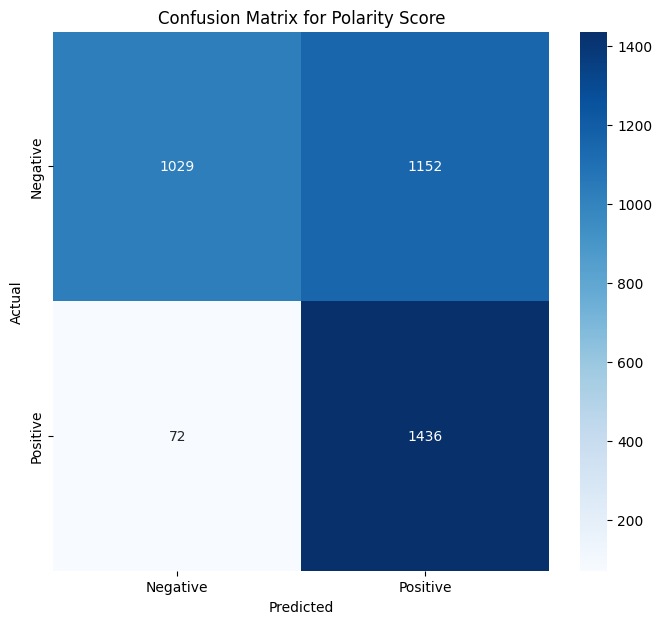

Classification Report for Polarity Score:
              precision    recall  f1-score   support

           0       0.93      0.47      0.63      2181
           1       0.55      0.95      0.70      1508

    accuracy                           0.67      3689
   macro avg       0.74      0.71      0.66      3689
weighted avg       0.78      0.67      0.66      3689



In [32]:
# evaluate the polarity score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix for polarity_score vs OverallRatingBinary
cm_polarity = confusion_matrix(data_new['OverallRatingBinary'], data_new['polarity_score'])
report_polarity = classification_report(data_new['OverallRatingBinary'], data_new['polarity_score'])

# Display confusion matrix for polarity_score
plt.figure(figsize=(8, 7))
sns.heatmap(cm_polarity, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Polarity Score')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for Polarity Score:")
print(report_polarity)

- True Positives (TP): 1436 (Actual High, Predicted High)
- True Negatives (TN): 1029 (Actual Low, Predicted Low)
- False Positives (FP): 1152 (Actual Low, Predicted High)
- False Negatives (FN): 72 (Actual High, Predicted Low

Although TextBlob has accurately predicted many reviews, it also produced a significant number of false positives. Before deciding whether to use the features generated from TextBlob's sentiment scoring, we will compare it with another technique, such as VADER, to evaluate its performance.

### VADER

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


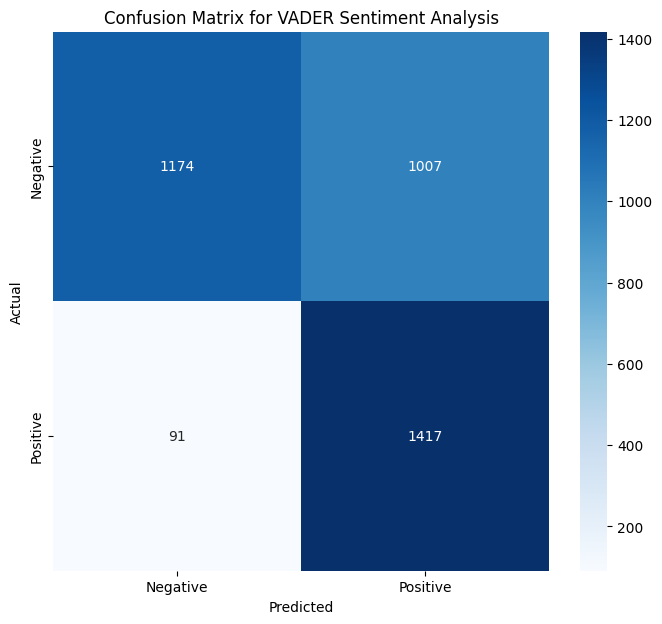

Classification Report for VADER Sentiment Analysis:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68      2181
           1       0.58      0.94      0.72      1508

    accuracy                           0.70      3689
   macro avg       0.76      0.74      0.70      3689
weighted avg       0.79      0.70      0.70      3689

Sample VADER Polarity Scores:
                                      CombinedReview  vader_polarity
0  service level far worse ryanair hour takeoff r...         -0.9177
1  upgrade member based status recently delay bri...         -0.7635
2  flight smooth quick boarded time took age get ...          0.4404
3  absolutely hopeless airline day flight advised...         -0.6353
4  customer service non existent traveled lisbon ...          0.8074
Sample VADER Sentiment Categories:
                                      CombinedReview vader_sentiment_score
0  service level far worse ryanair hour takeoff r...              n

In [34]:
# Function to classify sentiment using VADER
def classify_vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Function to get VADER polarity score
def get_vader_polarity(text):
    return vader_analyzer.polarity_scores(text)['compound']

# Create a copy for VADER analysis
data_new_vader = data_new.copy()

# Calculate VADER sentiment score and classify sentiment
data_new_vader['vader_polarity'] = data_new_vader['CombinedReview'].apply(get_vader_polarity)
data_new_vader['vader_sentiment_score'] = data_new_vader['CombinedReview'].apply(classify_vader_sentiment)

# Convert VADER sentiment to binary classification
data_new_vader['vader_sentiment_binary'] = data_new_vader['vader_sentiment_score'].apply(lambda x: 1 if x == 'positive' else 0)

# Calculate confusion matrix for VADER sentiment vs OverallRatingBinary
cm_vader = confusion_matrix(data_new_vader['OverallRatingBinary'], data_new_vader['vader_sentiment_binary'])
report_vader = classification_report(data_new_vader['OverallRatingBinary'], data_new_vader['vader_sentiment_binary'])

# Display confusion matrix for VADER sentiment
plt.figure(figsize=(8, 7))
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for VADER Sentiment Analysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for VADER Sentiment Analysis:")
print(report_vader)

# Display some statistics on VADER polarity and sentiment scores
print("Sample VADER Polarity Scores:")
print(data_new_vader[['CombinedReview', 'vader_polarity']].head())

print("Sample VADER Sentiment Categories:")
print(data_new_vader[['CombinedReview', 'vader_sentiment_score']].head())

- VADER's accuracy (7.0) is slightly better than TextBlob (0.67).
- Both methods have similar precision for Negative reviews, but VADER has slightly better precision for Positive reviews.
- VADER has a higher F1-score for Positive reviews, indicating better balance between precision and recall.
- VADER's overall performance is slightly better than that of TestBlob, hence its features will be engineered for further analysis

In [35]:
# Integrate the engineered features back into the original DataFrame
new_df['vader_polarity'] = data_new_vader['vader_polarity']
new_df['vader_sentiment_score'] = data_new_vader['vader_sentiment_score']
#new_df['vader_sentiment_binary'] = data_new_vader['vader_sentiment_binary'] #not necessary

# Display the first few rows of the updated DataFrame
print(new_df[['CombinedReview', 'vader_polarity', 'vader_sentiment_score']].head())


                                      CombinedReview  vader_polarity  \
0  service level far worse ryanair hour takeoff r...         -0.9177   
1  upgrade member based status recently delay bri...         -0.7635   
2  flight smooth quick boarded time took age get ...          0.4404   
3  absolutely hopeless airline day flight advised...         -0.6353   
4  customer service non existent traveled lisbon ...          0.8074   

  vader_sentiment_score  
0              negative  
1              negative  
2              positive  
3              negative  
4              positive  


In [36]:
new_df.head(1)

,OverallRating,Name,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,...,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter,Aircraft_Company,CombinedReview,vader_polarity,vader_sentiment_score
0,1.0,L Keele,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,...,Stuttgart,1,2023,11,145,2023Q4,Others,service level far worse ryanair hour takeoff r...,-0.9177,negative


In [7]:
# Save pre-processed data
#new_df.to_csv("/content/drive/MyDrive/preprocessed_data.csv", index=False)

# load the data
cleaned_data = pd.read_csv("/content/drive/MyDrive/preprocessed_data.csv")

# Label Encoding

In [8]:
# explore categorical columns
cat  = cleaned_data.select_dtypes(exclude = "number")
cat.columns

Index(['Name', 'VerifiedReview', 'TypeOfTraveller', 'SeatType', 'Recommended',
       'Wifi&Connectivity', 'DepartureCity', 'ArrivalCity', 'Quarter',
       'Aircraft_Company', 'CombinedReview', 'vader_sentiment_score'],
      dtype='object')

In [9]:
# explore numeric
num  = cleaned_data.select_dtypes(include = "number")
num.columns

Index(['OverallRating', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Food&Beverages', 'InflightEntertainment',
       'Route_missing', 'RouteFrequency', 'Year', 'Month',
       'MonthsSinceReference', 'vader_polarity'],
      dtype='object')

In [10]:
# label encoding of the categorical columns
from sklearn.preprocessing import LabelEncoder

# save a copy of df_2 to be used during the visualization stage
df_encoded = cleaned_data.copy()

# Columns to be label-encoded
label_encode_cols = ['VerifiedReview', 'TypeOfTraveller', 'SeatType', 'Recommended', 'Wifi&Connectivity', 'DepartureCity',
                     'ArrivalCity', 'Quarter', 'Aircraft_Company', 'vader_sentiment_score']

# Label encoding
for col in label_encode_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Dropping irrelevant columns
df_encoded.drop(columns=['Name'], inplace=True)
# the CombinedReview will be dropped during correlation analysis

# Display the DataFrame after encoding and dropping columns
df_encoded.head(2)


,OverallRating,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,...,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter,Aircraft_Company,CombinedReview,vader_polarity,vader_sentiment_score
0,1.0,1,1,1,1.0,1.0,1.0,1.0,0,1.0,...,623,1,2023,11,145,40,19,service level far worse ryanair hour takeoff r...,-0.9177,0
1,3.0,1,0,1,2.0,3.0,1.0,2.0,0,1.0,...,365,3,2023,11,145,40,1,upgrade member based status recently delay bri...,-0.7635,0


- the entire dataset has been encoded to numerical values that machine learning models will understand, with the exception of the 'CombinedReview' column

In [60]:
df_encoded.columns

Index(['OverallRating', 'VerifiedReview', 'TypeOfTraveller', 'SeatType',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity', 'Route_missing', 'DepartureCity', 'ArrivalCity',
       'RouteFrequency', 'Year', 'Month', 'MonthsSinceReference', 'Quarter',
       'Aircraft_Company', 'CombinedReview', 'vader_polarity',
       'vader_sentiment_score'],
      dtype='object')

# Data Visualization & Exploratory data analysis

1. Wordcloud for negative reviews:This visualizes the most frequent words used by users who gave a negative recommendation. This helps identify common issues or themes in negative reviews, providing insights into areas needing improvement.

The negative reviews can be plotted against the 'recommended' column, rating or extracts from the sentiment scoring techniques

In [61]:
# using the recommended column
cleaned_data["Recommended"].value_counts()

,count
Recommended,
no,2196
yes,1493


In [62]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, Recommended = "no"
negative_recommendations = cleaned_data[cleaned_data['Recommended'] == "no"]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_recommendations['CombinedReview'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

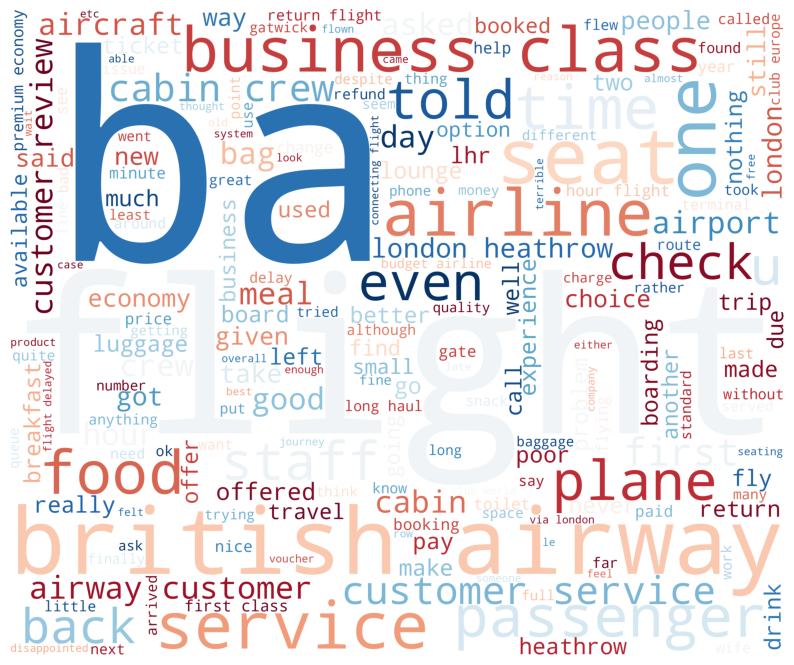

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

plt.figure(1, figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Univariate and Bivariate Distributions using Plotly

In [ ]:
df_encoded.columns

Index(['OverallRating', 'VerifiedReview', 'TypeOfTraveller', 'SeatType',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity', 'Route_missing', 'DepartureCity', 'ArrivalCity',
       'RouteFrequency', 'Year', 'Month', 'MonthsSinceReference', 'Quarter',
       'Aircraft_Company', 'CombinedReview', 'vader_polarity',
       'vader_sentiment', 'vader_sentiment_binary'],
      dtype='object')

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


In [60]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          3689 non-null   float64
 1   Name                   3689 non-null   object 
 2   VerifiedReview         3689 non-null   bool   
 3   TypeOfTraveller        3689 non-null   object 
 4   SeatType               3689 non-null   object 
 5   SeatComfort            3689 non-null   float64
 6   CabinStaffService      3689 non-null   float64
 7   GroundService          3689 non-null   float64
 8   ValueForMoney          3689 non-null   float64
 9   Recommended            3689 non-null   object 
 10  Food&Beverages         3689 non-null   float64
 11  InflightEntertainment  3689 non-null   float64
 12  Wifi&Connectivity      3689 non-null   object 
 13  Route_missing          3689 non-null   int64  
 14  DepartureCity          3689 non-null   object 
 15  Arri

#### 1.  Overall rating distribution

In [61]:
fig = px.histogram(cleaned_data, x='OverallRating', title='Distribution of Overall Ratings')
fig.update_layout(width=800, height=400)
fig.show()


- There is a significant peak at the lowest rating (0), indicating a large number of very dissatisfied customers. There are fewer ratings in the middle range (2-6), with another rise in higher ratings (7-10), suggesting a polarized customer satisfaction experience.

### 2. Distribution of Overall Rating by Aircraft Company

In [71]:
fig = px.bar(cleaned_data.groupby('Aircraft_Company')['OverallRating'].mean().reset_index(),
              x='Aircraft_Company', y='OverallRating',
              title='Average Overall Rating by Aircraft Company',
              labels={'OverallRating': 'Average Overall Rating', 'Aircraft_Company': 'Aircraft Company'})
fig.show()


- Notably, the Saab 2000 and Boeing 747 Family have the highest ratings, while the Boeing 757 and Airbus A321 Family have the lowest. This suggests significant variation in customer satisfaction across different aircraft types.

### Proportion of Seat Types

In [72]:
fig = px.pie(cleaned_data, names='SeatType', title='Proportion of Seat Types')
fig.show()


- Over half (52.2%) of the passengers flew Economy Class, followed by Business Class (32.3%), Premium Economy (9.76%), and First Class (5.75%). This indicates that Economy Class is the most popular choice among travelers, while First Class is the least common.

### 4. Verified Review Count by Type of Traveller

In [73]:
fig = px.histogram(cleaned_data, x='TypeOfTraveller', title='Count of Verified Reviews by Type of Traveller')
fig.update_layout(width=800, height=400)
fig.show()


### 5. Recommended vs Value for Money

In [83]:
fig = px.histogram(cleaned_data, x='ValueForMoney', color='Recommended',
                   barmode='stack',
                   title='Recommended vs Value for Money',
                   labels={'ValueForMoney': 'Value for Money', 'Recommended': 'Recommended'})

# Reduce the size of the plot
fig.update_layout(
    width=800,
    height=400
)
fig.show()

### 6. Calculate average recommendation status by year

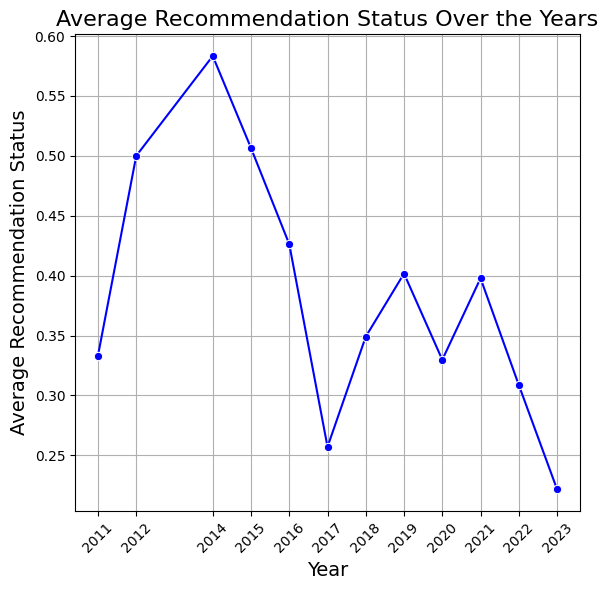

In [84]:
yearly_recommendation = df_encoded.groupby('Year')['Recommended'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(6, 6))
sns.lineplot(data=yearly_recommendation, x='Year', y='Recommended', marker='o', color='b')

# Customize the plot
plt.title('Average Recommendation Status Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Recommendation Status', fontsize=14)
plt.grid(True)
plt.xticks(yearly_recommendation['Year'].unique(), rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### 7. Average recommendation status by month

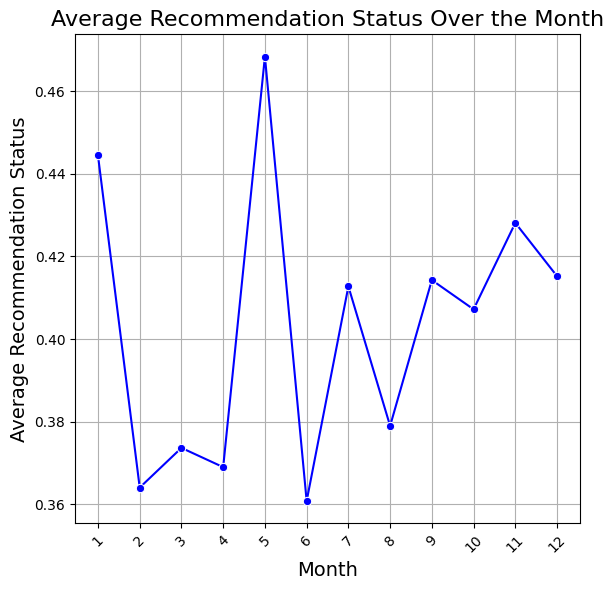

In [ ]:
# Calculate average recommendation status by month
monthly_recommendation = df_encoded.groupby('Month')['Recommended'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(6, 6))
sns.lineplot(data=monthly_recommendation, x='Month', y='Recommended', marker='o', color='b')

# Customize the plot
plt.title('Average Recommendation Status Over the Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Recommendation Status', fontsize=14)
plt.grid(True)
plt.xticks(monthly_recommendation['Month'].unique(), rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### 8. Distribution of Type of Travellers

In [85]:
fig = px.box(cleaned_data, x='TypeOfTraveller', y='SeatComfort', title='Seat Comfort by Type of Traveller')
fig.update_layout(width=800, height=400)
fig.show()


In [ ]:
fig = px.bar(cleaned_data, x='Aircraft_Company', title='Review Count by Aircraft Company')
fig.update_layout(width=800, height=400)
fig.show()


### 9. Review Count by Aircraft Company

In [89]:
# Create the bar chart
fig = px.bar(cleaned_data, x='Aircraft_Company', title='Review Count by Aircraft Company')

# Update layout for size and color
fig.update_layout(width=800, height=400)
fig.update_traces(marker_color='#4b0082')  # Deep Purple

# Show the figure
fig.show()

### 10. Overall Rating Distribution by Recommendation Status

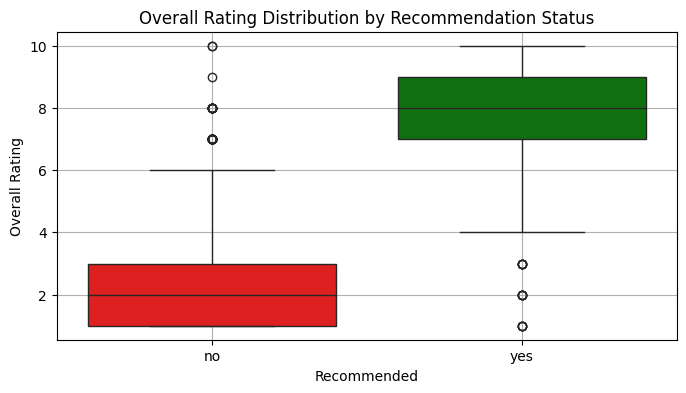

In [129]:
# using plt as opposed to plotly for color preference
plt.figure(figsize=(8, 4))
sns.boxplot(x='Recommended', y='OverallRating', data=cleaned_data,
            hue='Recommended', palette={'yes': 'green', 'no': 'red'},
            legend=False)  # Set colors for each recommendation status

# Customize plot appearance
plt.title('Overall Rating Distribution by Recommendation Status')
plt.xlabel('Recommended')
plt.ylabel('Overall Rating')
plt.grid(True)

# Show the plot
plt.show()

### 11. Overall Rating by Cabin Staff Service

In [130]:
# using box plot
fig = px.box(cleaned_data, x='CabinStaffService', y='OverallRating',
             title='Overall Rating by Cabin Staff Service',
             labels={'CabinStaffService': 'Cabin Staff Service', 'OverallRating': 'Overall Rating'},
             color='CabinStaffService',  # Color by Cabin Staff Service
             color_discrete_map={'Very Poor': 'red', 'Poor': 'orange',
                                 'Average': 'yellow', 'Good': 'lightgreen',
                                 'Excellent': 'green'})  # Adjust colors as needed

# Update layout
fig.update_layout(width=800, height=400)

# Show the plot
fig.show()

### 11. Recommendation Status by Food & Beverage Service

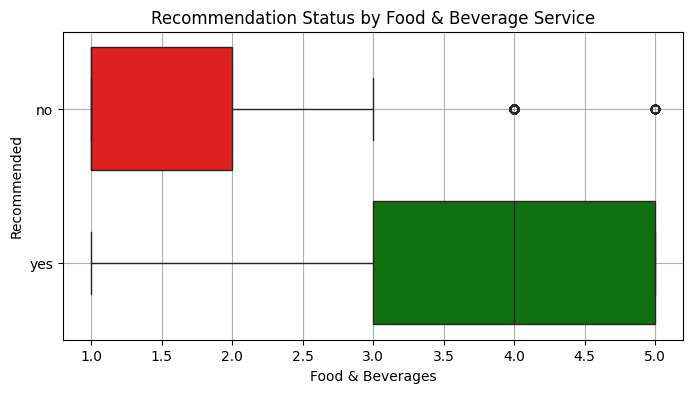

In [131]:
# using plt for color advantage
plt.figure(figsize=(8, 4))
sns.boxplot(x='Food&Beverages', y='Recommended', data=cleaned_data,
            hue='Recommended', palette={'yes': 'green', 'no': 'red'})  # Map colors to each recommendation status

# Add title and labels
plt.title('Recommendation Status by Food & Beverage Service')
plt.xlabel('Food & Beverages')
plt.ylabel('Recommended')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

- The quality of food and beverage service significantly impacts customer recommendations. By analyzing this relationship, airlines can gain valuable insights into how service quality influences customer satisfaction. Leveraging this information can help airlines enhance their offerings, improve customer experiences, and make informed decisions to boost overall satisfaction and loyalty.

### 12. Sentiment score distribution

In [132]:
fig = px.histogram(cleaned_data, x='vader_sentiment_score', title='Distribution of VADER Sentiment Scores')
fig.update_layout(width=800, height=400)
fig.show()

# Feature Selection: Using correlation analysis

In [134]:
#df_encoded.info(5)

In [9]:
# Drop the 'CombinedReview' column since it is the only object variable / non-numeric
df_encoded_2 = df_encoded.drop(columns=['CombinedReview'])

In [10]:

# Calculate the correlation matrix
mat_corr = df_encoded_2.corr()
mat_corr


,OverallRating,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,...,DepartureCity,ArrivalCity,RouteFrequency,Year,Month,MonthsSinceReference,Quarter,Aircraft_Company,vader_polarity,vader_sentiment_score
OverallRating,1.000000,-0.101023,0.089740,-0.007380,0.720618,0.648393,0.468146,0.872590,0.864760,0.754375,...,0.154052,0.144487,0.194271,-0.203067,0.001884,-0.204698,-0.204501,-0.130780,0.627576,0.541468
VerifiedReview,-0.101023,1.000000,0.113430,-0.038365,-0.057582,-0.017614,0.114300,-0.101587,-0.084162,-0.088452,...,-0.211923,-0.204638,-0.342404,0.666883,-0.037817,0.668889,0.669993,-0.116807,-0.106640,-0.100902
TypeOfTraveller,0.089740,0.113430,1.000000,0.103373,0.082920,0.066646,0.189422,0.090311,0.094945,0.055392,...,-0.110896,-0.135417,-0.202549,0.132460,0.041185,0.138014,0.137172,-0.079249,0.040314,0.033307
SeatType,-0.007380,-0.038365,0.103373,1.000000,0.058139,-0.039836,0.006140,-0.002646,-0.027363,-0.041161,...,-0.015300,-0.013100,-0.015134,-0.035811,0.027226,-0.033251,-0.033148,0.095994,0.000562,-0.000889
SeatComfort,0.720618,-0.057582,0.082920,0.058139,1.000000,0.577610,0.334186,0.680458,0.641878,0.590030,...,0.109162,0.102038,0.130984,-0.112831,0.001403,-0.113699,-0.113169,-0.039611,0.481020,0.410149
CabinStaffService,0.648393,-0.017614,0.066646,-0.039836,0.577610,1.000000,0.298360,0.588512,0.599789,0.619447,...,0.069765,0.075238,0.079056,-0.050303,-0.012082,-0.052035,-0.052462,-0.065656,0.433698,0.356119
GroundService,0.468146,0.114300,0.189422,0.006140,0.334186,0.298360,1.000000,0.418597,0.394496,0.320603,...,-0.318277,-0.311313,-0.473757,0.144270,0.006958,0.146307,0.144620,-0.410715,0.334724,0.293126
ValueForMoney,0.872590,-0.101587,0.090311,-0.002646,0.680458,0.588512,0.418597,1.000000,0.799617,0.708563,...,0.150198,0.145045,0.205347,-0.205638,-0.000717,-0.207567,-0.207908,-0.109639,0.568935,0.492635
Recommended,0.864760,-0.084162,0.094945,-0.027363,0.641878,0.599789,0.394496,0.799617,1.000000,0.695090,...,0.129000,0.128747,0.180267,-0.172910,0.009384,-0.173475,-0.173524,-0.117327,0.570579,0.487482
Food&Beverages,0.754375,-0.088452,0.055392,-0.041161,0.590030,0.619447,0.320603,0.708563,0.695090,1.000000,...,0.162890,0.153655,0.192015,-0.178815,0.001605,-0.180257,-0.179931,-0.053675,0.491062,0.413810


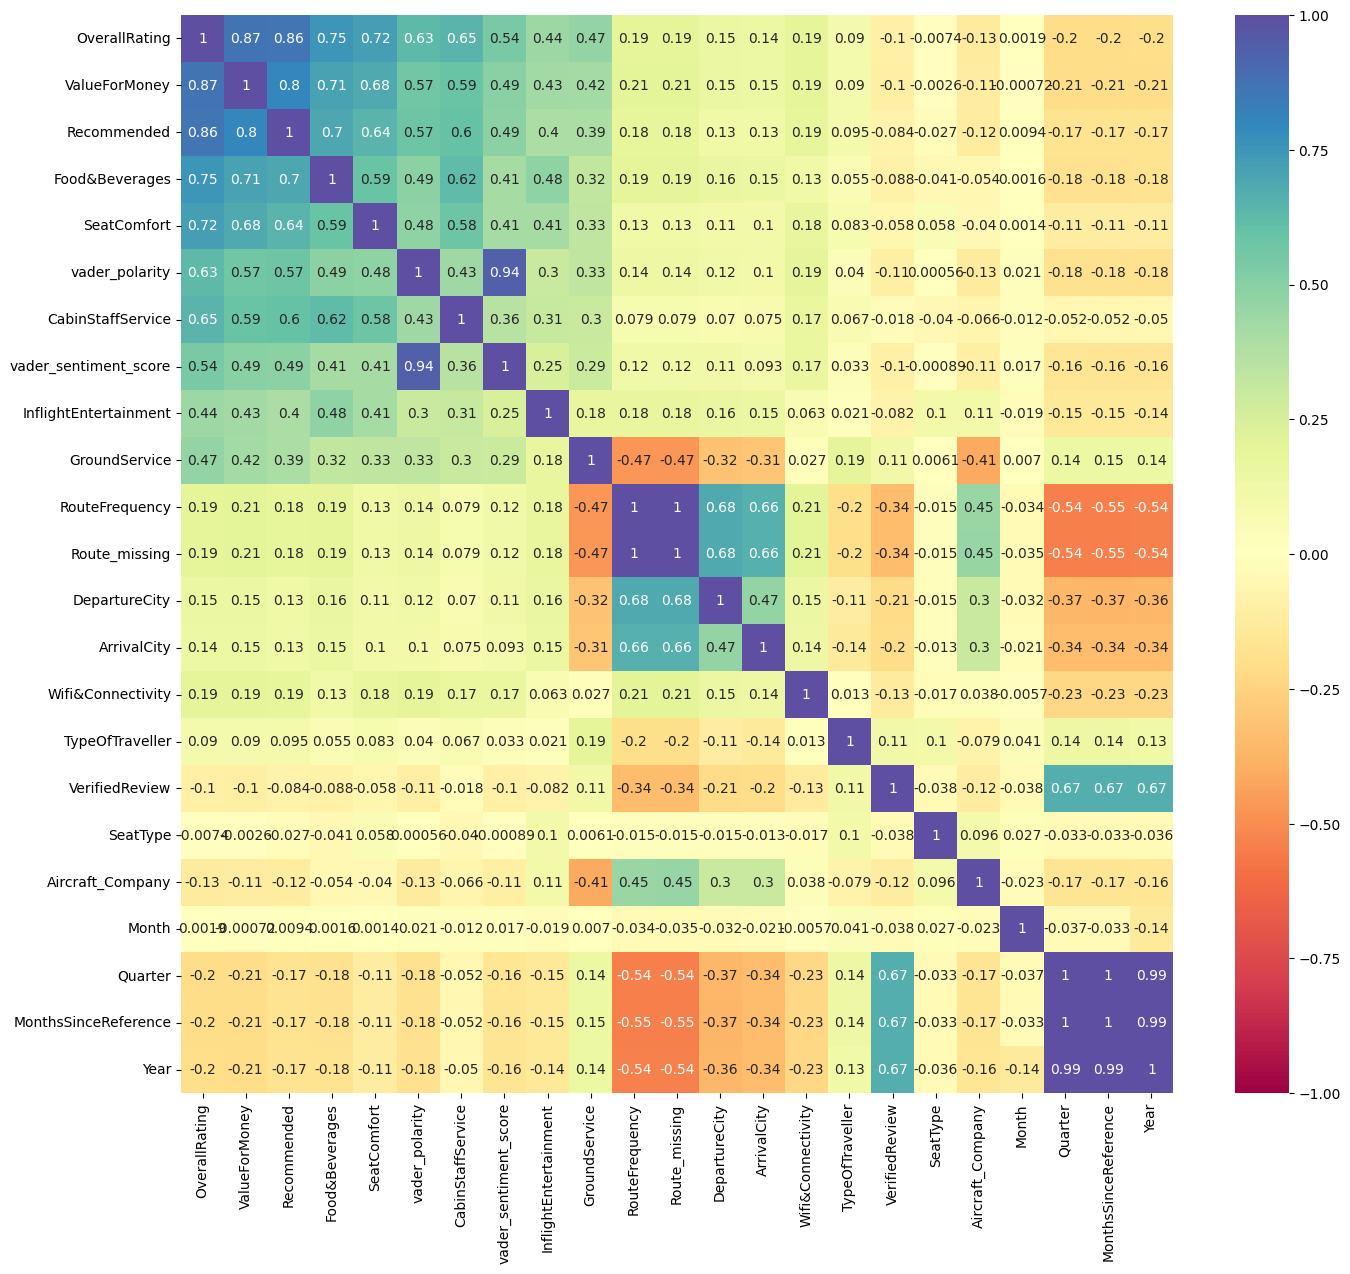

In [11]:
# Sort the correlation matrix
sorted_indices = np.argsort(mat_corr.sum().values)[::-1]
sorted_mat_corr = mat_corr.iloc[sorted_indices, sorted_indices]

# Visualizing the sorted correlation
plt.figure(figsize=(16, 14))
sns.heatmap(sorted_mat_corr, annot=True, vmin=-1, vmax=1, cmap="Spectral", annot_kws={"size": 10})
plt.show()

Recommended or OverallRating can be used as the target variable. Predicting whether a customer would recommend the service is useful for making actionable decisions. It directly reflects customer willingness to endorse or recommend the service, which can be a strong indicator of overall satisfaction and loyalty. In addition, it's binary compared to predicting a continuous variable like "OverallRating" with 10 values.

In [63]:
# selecting only the top 20 correlated columns to the dependent variable
# Get the correlation values for the "OverrallRating" column
correlations = mat_corr['Recommended']

# Sort the correlations in descending order
top_20_variables = correlations.abs().sort_values(ascending=False).head(20)

# Remove the "User_Satisfaction" column from the list
top_20_variables = top_20_variables.drop('Recommended')

# Print the top 20 correlated columns
print(top_20_variables)

OverallRating            0.864760
ValueForMoney            0.799617
Food&Beverages           0.695090
SeatComfort              0.641878
CabinStaffService        0.599789
vader_polarity           0.570579
vader_sentiment_score    0.487482
InflightEntertainment    0.395196
GroundService            0.394496
Wifi&Connectivity        0.185449
RouteFrequency           0.180267
Route_missing            0.180260
Quarter                  0.173524
MonthsSinceReference     0.173475
Year                     0.172910
DepartureCity            0.129000
ArrivalCity              0.128747
Aircraft_Company         0.117327
TypeOfTraveller          0.094945
Name: Recommended, dtype: float64


- ValueForMoney and Food&Beverages demonstrate the highest correlation with the overall service rating, indicating that customers' perceptions of value and quality food services are strongly linked to their overall rating of the airline service.

- The SeatComfort, CabinStaffService,  InFlightEntertainment, and GroundService demonstrate a moderately positive correlation with the Recommendation feature and OverallRating. This indicates that improvements in these areas could lead to higher overall ratings and more recommendations from passengers. Therefore, service personnel should focus on enhancing the quality of cabin staff service, inflight entertainment, and ground services to positively impact passenger satisfaction and recommendation likelihood.

- The VADER sentiment score generated from the customers' written reviews demonstrates a correlation of 49% with the Recommendation feature and 54% with overall rating. This indicates that the sentiment expressed in customer reviews is moderately predictive of whether a customer is likely to recommend the service. Hence, analyzing customer sentiment can provide valuable insights into overall customer satisfaction and areas needing improvement.

- Aircraft company, Wifi connectivity, departure city and arrival city demonstrate a correlation of 0.11, 0.12, 0.12 and 0.12 repsectively with the user's recommendation rating, indicating a weak positive relationship.

- Other variables that did not fall under the top 20 correlated variables show no significant correlation with the recommendation rating. Hence, they will not be included during the modelling stage for computational reasons

# Model Development

Since the response variable, "OverallReview," is categorical, predicting it represents a multi-class classification problem. For the text data column, features extracted from VADER sentiment scores, TF-IDF, and LSTM models will be utilized to replace the text reviews in the modeling process.

The following models will be explored in this M.Sc project;

- Logistic Regression
- Naive Bayes
- Support Vector Machine
- XGBoost
- LSTM (Deep Learning)

## 1. Classification Models Using VADER Sentiment Score for Text Data


#### Logistic regression

In [194]:
df_encoded.Recommended.value_counts()

,count
Recommended,
0,2196
1,1493


In [ ]:
new_data = df_encoded[top_20_variables.index.tolist() + ['Recommended']]
new_data = new_data.drop(columns=['OverallRating'])

"""Since "OverallRating" is highly correlated with "Recommended" and effectively passes the same information,
dropping "OverallRating" prevents data leakage and ensures that the model predicts "Recommended" based on other features."""

# Save the reduced data
#new_data.to_csv("/content/drive/MyDrive/new_data.csv", index=False)

In [11]:
# load the data
new_data = pd.read_csv("/content/drive/MyDrive/new_data.csv")
new_data.head(2)

,ValueForMoney,Food&Beverages,SeatComfort,CabinStaffService,vader_polarity,vader_sentiment_score,InflightEntertainment,GroundService,Wifi&Connectivity,RouteFrequency,Route_missing,Quarter,MonthsSinceReference,Year,DepartureCity,ArrivalCity,Aircraft_Company,TypeOfTraveller,Recommended
0,1.0,1.0,1.0,1.0,-0.9177,0,1.0,1.0,5,1,0,40,145,2023,191,623,19,1,0
1,2.0,1.0,2.0,3.0,-0.7635,0,2.0,1.0,1,3,0,40,145,2023,54,365,1,0,0


In [107]:
# import necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score, recall_score

In [108]:
from sklearn.model_selection import train_test_split
# separate X and y variables
X = new_data.drop(columns=['Recommended', 'vader_polarity'])# vader_sentiment_score is enough to prevent mulitcolinearity
y = new_data['Recommended'] # dataset with the label (target variable)

In [109]:
# split the data to ratio 70:15:15 for training, testing and validation
X_train, X_train_val, y_train, y_train_val = train_test_split(X, y, test_size=0.3,
                                                              random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_train_val, y_train_val, test_size=0.5,
                                                random_state=0, stratify=y_train_val)

In [110]:
# confirm splitting

# Calculate the percentage of  train, validation, and test data
total_data = len(X_train) + len(X_val) + len(X_test)
train_percentage = (len(X_train) / total_data) * 100
val_percentage = (len(X_val) / total_data) * 100
test_percentage = (len(X_test) / total_data) * 100
# Print the percentage of resized train, validation, and test sets
print("Percentage of train set: {:.2f}%".format(train_percentage))
print("Percentage of validation set: {:.2f}%".format(val_percentage))
print("Percentage of test set: {:.2f}%".format(test_percentage))

Percentage of train set: 69.99%
Percentage of validation set: 14.99%
Percentage of test set: 15.02%


In [111]:
### Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)
X_val_sd = scaler.transform(X_val)


In [112]:

# Initialize and train the Logistic Regression model with increased iterations and alternative solver
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train_sd, y_train)  # Fit the model


LogisticRegression(max_iter=500)

In [113]:
# evaluate model

# Define the function for prediction and evaluation
def evaluate_model(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))

In [114]:
# Evaluate the model on train set
evaluate_model(log_reg, X_train_sd, y_train)

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [115]:
# Evaluate the model on validation set
evaluate_model(log_reg, X_val_sd, y_val)

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


- the logistic regression performance demonstrates a 92% performance accross all metrics

### Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_sd, y_train)

GaussianNB()

In [117]:
# Evaluate the model on train set
evaluate_model(nb_model, X_train_sd, y_train)

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


In [118]:
# Evaluate the model on val set
evaluate_model(nb_model, X_val_sd, y_val)

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.90


- no improvement

### Support Vector Machine

In [119]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear',random_state =0)
svm_model.fit(X_train_sd, y_train)  # Fit the model


SVC(kernel='linear', random_state=0)

In [120]:
# Evaluate the model on train set
evaluate_model(svm_model, X_train_sd, y_train)



Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [121]:
# Evaluate the model on test set
evaluate_model(svm_model, X_test_sd, y_test)



Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


- the training set performed slightly better

In [122]:
# exploring other kernels
svm_model_2= SVC(kernel='poly', random_state =0
                            )
svm_model_2.fit(X_train_sd, y_train)

SVC(kernel='poly', random_state=0)

In [123]:
# Evaluate the model on train set
evaluate_model(svm_model_2, X_train_sd, y_train)



Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [124]:
# Evaluate the model on train set
evaluate_model(svm_model_2, X_test_sd, y_test)



Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


#### XGBoost Model

In [125]:
# import the XBBoost classifier
from xgboost import XGBClassifier
# instantiate the model
xg_boost = XGBClassifier(random_state= 0)

# train the model
xg_boost.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [126]:
# Evaluate the model on train set
evaluate_model(xg_boost, X_train, y_train)



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


- the 100% accuracy is indicative of overfitting on the training set

In [127]:
evaluate_model(xg_boost, X_test, y_test)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


- the ensemble model is overfitting which is a common limitation of tree-based models. Pre-pruning by adjusting the max-depth will be applied to address the overfitting

In [128]:
# Apply pre-pruning by using max_depth of 4 for instance
xg_boost_2 = XGBClassifier(random_state = 0, class_weight = {0:0.1, 1:0.9},
                               max_depth = 4)
# train the model
xg_boost_2.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:10:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 0.1, 1: 0.9}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [129]:
# Evaluate the model on train set
evaluate_model(xg_boost_2, X_train, y_train)



Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [130]:
evaluate_model(xg_boost_2, X_test, y_test)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


The model shows high performance with 99% accuracy on training data and 93% on testing data. This suggests strong learning and good generalization, but the slight drop in test accuracy indicates minor overfitting

#### Feature importance using XGBoost result
Since XGBoost is a tree-based model, we can capitalize on its feature importance functionality to identify the top features that contributed to the prediction of user recommendation/ satisfaction

In [131]:
# feature importance of the enhanced XGBoost model
xg_imp = xg_boost_2.feature_importances_
xg_imp

array([0.6685787 , 0.0288875 , 0.03704576, 0.06921503, 0.05204773,
       0.01385561, 0.02145169, 0.0094029 , 0.0146186 , 0.        ,
       0.0166016 , 0.01403596, 0.        , 0.01152193, 0.0134724 ,
       0.01599668, 0.01326799], dtype=float32)

In [132]:
feat_names = list(X.columns)

def visualize_importance_features(imp):
    indices = np.argsort(imp)

    plt.figure(figsize = (12,7))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), imp[indices], color ="violet",
            align = "center")
    plt.yticks(range(len(indices)),[feat_names[i] for i in indices])
    plt.xlabel("Relative Importances")
    plt.show()

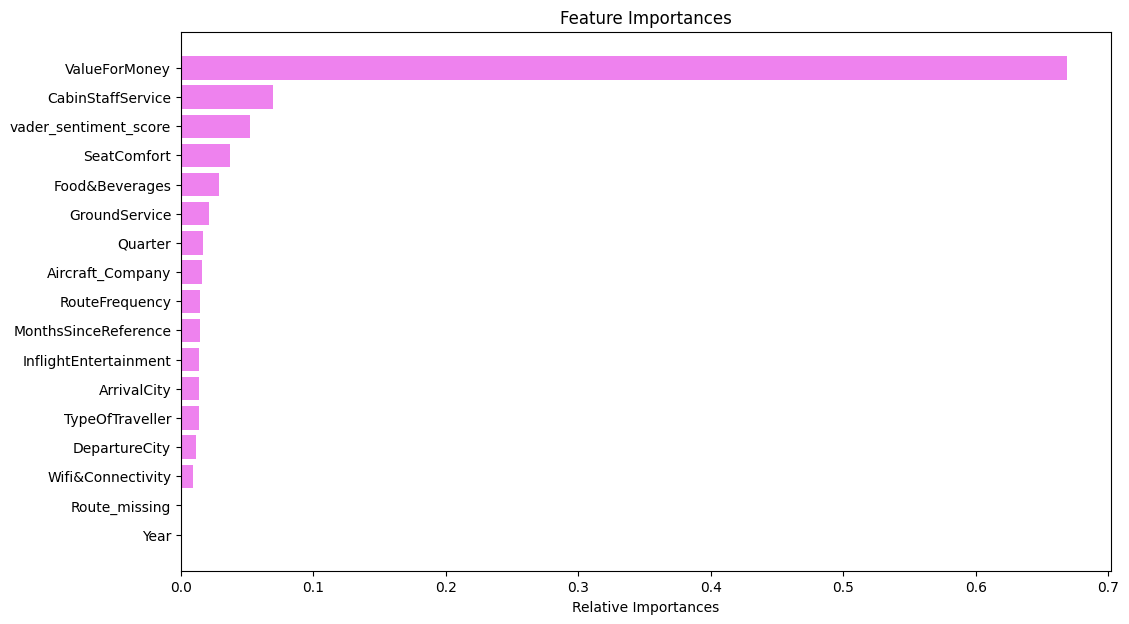

In [133]:
visualize_importance_features(xg_imp)

The feature importances derived from the XGBoost model trained shows that

- ValueForMoney: This is by far the most important feature, suggesting that customers' perception of whether the service offers good value for money is the primary determinant in whether they recommend the airline.
- CabinStaffService: The second most important feature, indicating that the quality of service provided by the cabin staff plays a significant role in recommendations.
- vader_sentiment_score: This feature, representing the sentiment analysis score generated from their written reviews is also highly important. Positive sentiments in reviews likely correlate with higher recommendations

- SeatComfort: Comfort of the seats is another key factor influencing
recommendations.

- Food&Beverages: The quality and variety of food and beverages provided also affect recommendations.

- GroundService: The quality of services provided on the ground (e.g., check-in, boarding) is also significant, though less so than in-flight services.

- Quarter: The time of year (quarter) seems to have some impact, perhaps due to seasonal variations in service or passenger expectations.

- Aircraft_Company: Different airlines may have varying levels of service quality, affecting recommendations

Airlines might focus on pricing strategies, offering more competitive fares or enhancing the perceived value through better services. It is also recommended that airline companies invest in staff training and ensuring excellent customer service that can lead to higher recommendations and more sales. In addition, computational resources can be allocated more effectively by prioritizing the most important features in future models or studies.

### 2. Classification Models Using TF-IDF for Text Data


In [134]:
new_data.columns

Index(['ValueForMoney', 'Food&Beverages', 'SeatComfort', 'CabinStaffService',
       'vader_polarity', 'vader_sentiment_score', 'InflightEntertainment',
       'GroundService', 'Wifi&Connectivity', 'RouteFrequency', 'Route_missing',
       'Quarter', 'MonthsSinceReference', 'Year', 'DepartureCity',
       'ArrivalCity', 'Aircraft_Company', 'TypeOfTraveller', 'Recommended'],
      dtype='object')

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Keep only 500 features as number of features will increase the processing time
tfidf_vec = TfidfVectorizer(max_features=500)

# Fit and transform the CombinedReview text data
text_vectors = tfidf_vec.fit_transform(df_encoded["CombinedReview"])

# Convert the vectors to array
text_vectors = text_vectors.toarray()

In [89]:
text_vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09080912,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
text_vectors.shape

(3689, 500)

- CombinedReview has been converted to vectors machine learning models can understand. The vectors will be replaced with the vader_sentiment_score in in the dataset to prevent overlapping of extracts from two different nlp feature extraction types. Then, the model will be splitted and trained using classical machine learning models such as SVM, NB, LR and tree-based model e.g. XGBoost.

In [135]:
# Convert the text vectors to a DataFrame

tfidf_df = pd.DataFrame(text_vectors, columns=tfidf_vec.get_feature_names_out())

# Drop the unwanted columns from new_data
tfidf_data = new_data.drop(columns=["vader_sentiment_score", "vader_polarity"])

# Add the TF-IDF vectors to tfidf_data
tfidf_data = pd.concat([tfidf_data, tfidf_df], axis=1) # adding vectors generated from tf-idf

# Select the features and target
X_2 = tfidf_data.drop(columns=["Recommended"])
y_2 = tfidf_data["Recommended"]

# Display the column names of X to verify
print(X_2.columns)

Index(['ValueForMoney', 'Food&Beverages', 'SeatComfort', 'CabinStaffService',
       'InflightEntertainment', 'GroundService', 'Wifi&Connectivity',
       'RouteFrequency', 'Route_missing', 'Quarter',
       ...
       'work', 'working', 'world', 'worse', 'worst', 'worth', 'would', 'wrong',
       'year', 'yet'],
      dtype='object', length=516)


In [136]:
# splitting

# Split data into training and testing set only.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)


In [137]:
### Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sd_2 = scaler.fit_transform(X_train_2)
X_test_sd_2 = scaler.transform(X_test_2)

#### Logistic regression

In [138]:
log_reg_tfidf= LogisticRegression(max_iter=500, solver='lbfgs')
log_reg_tfidf.fit(X_train_sd_2, y_train_2)  # Fit the model

LogisticRegression(max_iter=500)

In [139]:
# Evaluate the model on train set
evaluate_model(log_reg_tfidf, X_train_sd_2, y_train_2)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [143]:
# Evaluate the model on test set
evaluate_model(log_reg_tfidf, X_test_sd_2, y_test_2)

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


### Naive Bayes

In [144]:
# Initialize and train the Naive Bayes model
nb_model_tfidf = GaussianNB()
nb_model_tfidf.fit(X_train_sd_2, y_train_2)

GaussianNB()

In [145]:
# Evaluate the model on train set
evaluate_model(nb_model_tfidf, X_train_sd_2, y_train_2)

Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1 Score: 0.86


In [146]:
evaluate_model(nb_model_tfidf, X_test_sd_2, y_test_2)

Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.84


#### Support Vector Machine

In [147]:
# Initialize and train the SVM model
svm_model_tfidf = SVC(kernel='linear',random_state =0)
svm_model_tfidf.fit(X_train_sd_2, y_train_2)


SVC(kernel='linear', random_state=0)

In [148]:
evaluate_model(svm_model_tfidf, X_train_sd_2, y_train_2) # train set

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [149]:
evaluate_model(svm_model_tfidf, X_test_sd_2, y_test_2) # test set

Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.87


### XGBoost

In [150]:
# import the XBBoost classifier
from xgboost import XGBClassifier
# instantiate the model
xg_boost_tfidf = XGBClassifier(random_state= 0)

# train the model
xg_boost_tfidf.fit(X_train_2, y_train_2) #  no need for scaling



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [151]:
# Evaluate the model on train set
evaluate_model(xg_boost_tfidf, X_train_2, y_train_2)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [152]:
# Evaluate the model on train set
evaluate_model(xg_boost_tfidf, X_test_2, y_test_2)

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


-  The XGBoost models developed using both VADER sentiment analysis and TF-IDF stages outperformed other classification models. Overall, the VADER sentiment models performed better than the TF-IDF models, indicating that VADER sentiment was more effective in extracting relevant features from customer reviews. Additionally, the classification models built with VADER sentiment scores and other categorical variables showed relatively less overfitting compared to those using TF-IDF.

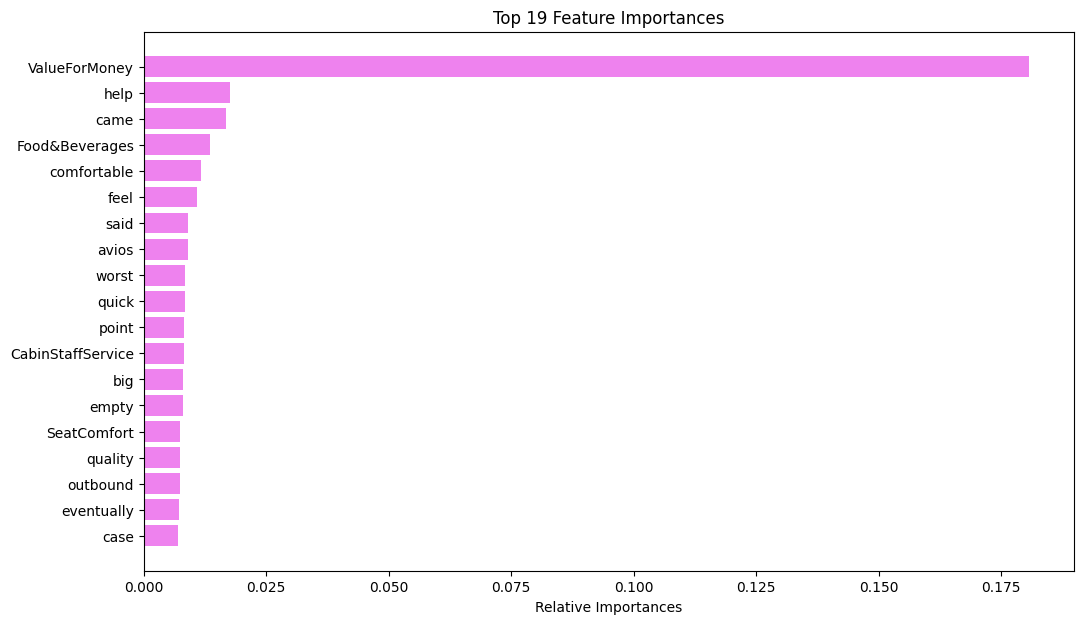

In [156]:
xg_imp_2 = xg_boost_tfidf.feature_importances_
feat_names = list(X_2.columns)
# Get indices of the top 19 features
top_n = 19
indices = np.argsort(xg_imp_2)[-top_n:]

# Select the top 19 feature importances and their names
top_features = [feat_names[i] for i in indices]
top_importances = xg_imp_2[indices]
plt.figure(figsize=(12, 7))
plt.title("Top 19 Feature Importances")
plt.barh(range(top_n), top_importances, color="violet", align="center")
plt.yticks(range(top_n), top_features)
plt.xlabel("Relative Importances")
plt.show()

The visualization of the top 19 contributing features in the XGBoost model using TFIDF vectors from the written reviews reveals show that both texts from the user reviews and categorical features play crucial roles in determining the target outcome. Here are some key insights and observations:

1.  ValueForMoney: This feature consistently stands out as the most important predictor. This aligns with previous models, indicating that customers' perception of value significantly impacts their recommendations.

2.  Words from Reviews: Several words from the text reviews emerged as highly influential features. Notable examples include:

- help: Indicates that assistance and customer service are critical.
- came: Might be related to the timing or arrival aspects of the service.
- comfortable: Reflects passengers' comfort levels, a key aspect of their overall experience.
- feel: Suggests that emotional responses and feelings about the service are pivotal.
- said: Could relate to communication and statements made by the staff or passengers.

Other 3 categorical cariables taht contributed to user satisafction include

3. CabinStaffService: The quality of cabin staff service is a significant factor, emphasizing the importance of staff interactions.
4. Food&Beverages: The availability and quality of food and beverages contribute notably to the overall experience.
SeatComfort: The comfort of the seats is crucial for passenger satisfaction.

Airline companies should prioritize key aspects identified in customer feedback, such as value for money, staff service quality, and comfort. Emphasize improving assistance, timely service, and communication. Analyze customer reviews to identify and address specific pain points, ensuring a comprehensive and satisfying customer experience.

# Hyperparameter tuning
The best performing model so far is the XGBoost model built using vader sentiment score and other correlated features. The model will undergo hyperparameter tuning to further enhance it.

In [161]:
# hyperparameter tuning of XGBoost
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# optimizing accuracy
acc_scorer = make_scorer(accuracy_score)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xg_boost, param_grid=param_grid, scoring=acc_scorer, cv=3)

In [162]:
# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(accuracy_score))

In [163]:
# Get the best parameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 1.0}

In [164]:
optimized_xgboost_model = grid_search.best_estimator_

In [166]:
# cre-evauating the training set using the optimized xg_boost
y_pred_train = optimized_xgboost_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)

Training Set Accuracy: 0.9473276529821844


In [172]:
new_data.Recommended.value_counts()

,count
Recommended,
0,2196
1,1493


- 0 is for no, 1 represents yes

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


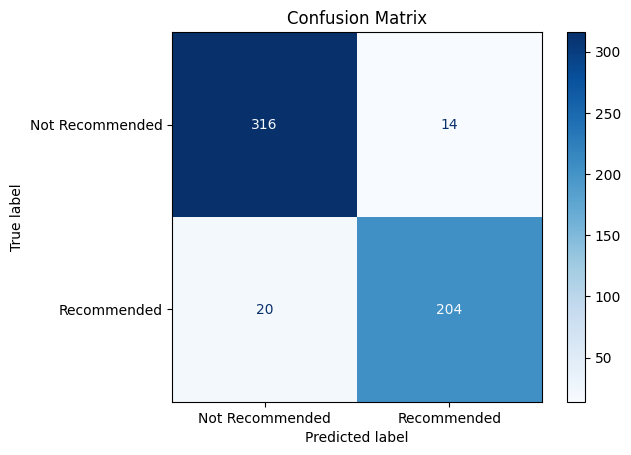

In [174]:
# prediction on test set
y_test_xg = le.fit_transform(y_test)
y_pred_xg = optimized_xgboost_model.predict(X_test)
evaluate_model(optimized_xgboost_model, X_test, y_test)
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_xg = confusion_matrix(y_test_xg, y_pred_xg)
disp_xg = ConfusionMatrixDisplay(conf_matrix_xg, display_labels=['Not Recommended', 'Recommended'])
disp_xg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Observations
- High performance of 94% across all metrics on test sets indicates strong model performance with relative low signs of overfitting. Hence the optimized XGBoost model is the best performing model so far
- True Negatives (TN): The enhanced XGBoost model Correctly predicted 316 rows as Recommended
- True Positives (TP): 204 Correctly predicted as Recommended
- False Negatives (FN): 20 Actual Recommended were found to be predicted as Not Recommended
- False Positives (FP): 14 Actual Not Recommended but predicted as Recommended


## Cross-validation of XGboost using K-Fold
Cross-validation on the training set helps assess the model’s performance and generalizability during training. It provides insights into how well the model might perform on unseen data by dividing the training data into multiple folds.

In [177]:
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost model with the correct parameters
xgboost_model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.01,
    max_depth=5,
    n_estimators=300,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=0
)

# 5-fold cross-validation
cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation scores: [0.92649903 0.9245648  0.91860465 0.9244186  0.93023256]
Mean accuracy: 0.9248639287481444
Standard deviation: 0.0037672827441540785


The model has a mean accuracy of 92.49%, indicating strong performance across different folds of the training data. The standard deviation of 0.38% suggests that the accuracy is consistent and stable across different folds, indicating that the model’s performance is reliable and not highly variable.

Overall, these results are promising and suggest that the XGBoost model is effective for the task at hand

# Deep learning using LSTM

In [12]:
# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=None, split=' ')  # Allowing all words
tokenizer.fit_on_texts(df_encoded['CombinedReview'].values)

# Determine the actual number of words
num_words = len(tokenizer.word_index) + 1

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df_encoded['CombinedReview'].values)

# Pad sequences to ensure uniform input length
X = pad_sequences(X_sequences, maxlen=100)

# Combine with new_data
X_combined = pd.concat([new_data.reset_index(drop=True), pd.DataFrame(X)], axis=1)

# Extract features and target
X_features = X_combined.drop(columns=['Recommended']).values  # Dropping the 'Recommended' target
y = new_data["Recommended"].values  # Target column

In [14]:
# Convert target variable to categorical
y_enc = to_categorical(y, num_classes=2)

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_features, y_enc, test_size=0.1, random_state=42)


In [15]:
# Define the LSTM architecture
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=120, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# training the model
batch_size = 32
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - accuracy: 0.6582 - loss: 0.5976 - val_accuracy: 0.8645 - val_loss: 0.3429
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 348ms/step - accuracy: 0.9044 - loss: 0.2529 - val_accuracy: 0.8554 - val_loss: 0.3470
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.9542 - loss: 0.1586 - val_accuracy: 0.8675 - val_loss: 0.3692
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 299ms/step - accuracy: 0.9705 - loss: 0.0891 - val_accuracy: 0.8735 - val_loss: 0.4594
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - accuracy: 0.9839 - loss: 0.0573 - val_accuracy: 0.8705 - val_loss: 0.4476
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 284ms/step - accuracy: 0.9899 - loss: 0.0401 - val_accuracy: 0.8584 - val_loss: 0.6283
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 271ms/step - accuracy: 0.9960 - loss: 0.0194 - val_accuracy: 0.8584 - val_loss: 0.5843
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - accuracy: 0.9969 - loss: 0.0146 - val_accu

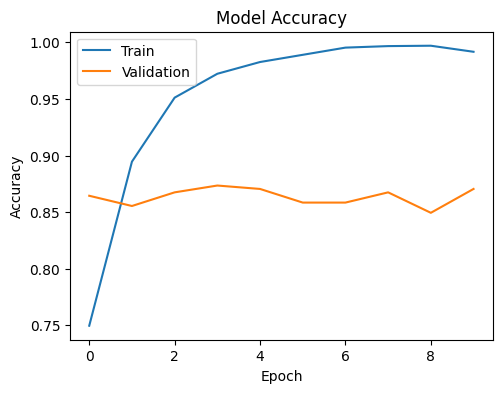

In [17]:
## Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


- The training accuracy increased progressively but the validation accuracy did not improve

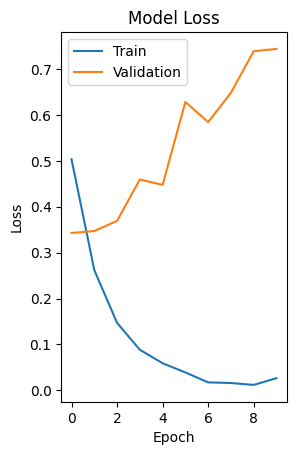

In [18]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

- the model is overfitting

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


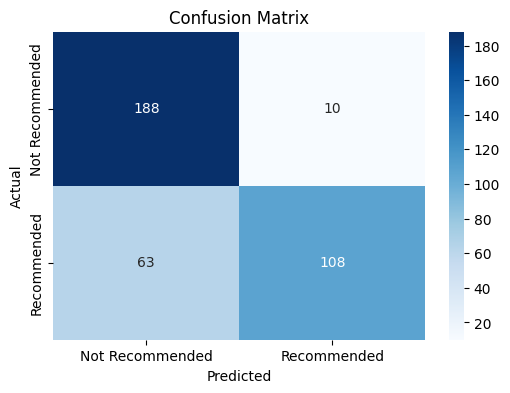

                 precision    recall  f1-score   support

Not Recommended       0.75      0.95      0.84       198
    Recommended       0.92      0.63      0.75       171

       accuracy                           0.80       369
      macro avg       0.83      0.79      0.79       369
   weighted avg       0.83      0.80      0.80       369



In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting the test set results
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions from one-hot encoding to single label
y_test_single = y_test.argmax(axis=1)
y_pred_single = y_pred.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_single, y_pred_single)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test_single, y_pred_single, target_names=['Not Recommended', 'Recommended'])
print(report)

For "Not Recommended" reviews, the LSTM model achieved a high precision of 0.75 and an impressive recall of 0.95, leading to an F1-score of 0.84. For "Recommended" reviews, the model had a precision of 0.92 and a lower recall of 0.63, resulting in an F1-score of 0.75. Overall accuracy is 0.80.

The confusion matrix shows that the model correctly classified 108 "Not Recommended" reviews and misclassified 10, while it correctly identified 108 "Recommended" reviews and misclassified 68. This suggests the deep learning model is more effective at identifying "Not Recommended" reviews.

## Conclusion

Overall, the XGBoost model using VADER for text feature extraction (sentiment score) performed better than the LSTM deep learning model. This superior performance may be attributed to the dataset's structure, which included categorical variables more effectively handled by tree-based models like XGBoost. The XGBoost model demonstrated an impressive 94% accuracy across all metrics on the unseen/test data after hyperparameter tuning.

Future research could further optimize the model by exploring more advanced NLP techniques, such as BERT.

Airline service companies should prioritize improving aspects like value for money, food and beverage quality, and other customer sentiments highlighted in the feature importance analysis of the XGBoost model. This approach could enhance customer satisfaction and overall service quality.